# IBM Garage Fast Start Qiskit Demo
- **Huang Junye**
- Quantum Developer Advocate
- IBM Quantum & Qiskit
- April 28, 2020

- [Interact online](https://nbviewer.jupyter.org/github/HuangJunye/presentations/blob/master/2020-04-28%20IBM%20Garage%20Fast%20Start/IBM%20Garage%20Fast%20Start%20Qiskit%20Demo.ipynb)
- [Source code](https://github.com/HuangJunye/presentations/blob/master/2020-04-28%20IBM%20Garage%20Fast%20Start/IBM%20Garage%20Fast%20Start%20Qiskit%20Demo.ipynb)

# Outline
- Qiskit elements
- Demo
    - Superposition
    - Measurement
    - Entanglement
    - Quantum gates
    - Interference

# Qiskit Elements
- [Qiskit Terra](https://qiskit.org/documentation/the_elements.html#terra): Composing quantum programs at the level of circuits and pulses with the code foundation.
- [Qiskit Aer](https://qiskit.org/documentation/the_elements.html#aer): Accelerating development via simulators and noise models
- [Qiskit Ignis](https://qiskit.org/documentation/the_elements.html#ignis): Addressing noise and errors
- [Qiskit Aqua](https://qiskit.org/documentation/the_elements.html#aqua): Building algorithms and applications

# Demo

[IBM Quantum Experience](https://quantum-computing.ibm.com/composer/ddfedca0eb599c89a1a38ee16be048a5)

## Superposition
Superposition is creating a quantum state that is a combination of |0> and |1>.
<img src="figures/Schrodingers_cat.svg" alt="Schrodinger's cat" style="width: 1200px;"/>

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_bloch_multivector, plot_state_city, plot_histogram
%config InlineBackend.figure_format = 'svg' # Makes the images look nice

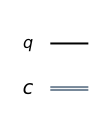

In [2]:
qc0 = QuantumCircuit(1,1)
qc0.draw('mpl')

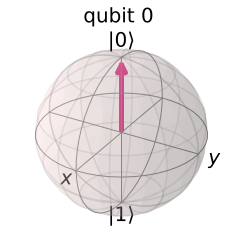

In [3]:
statevector_simulator = Aer.get_backend('statevector_simulator')
state0 = execute(qc0, statevector_simulator).result().get_statevector()
plot_bloch_multivector(state0)

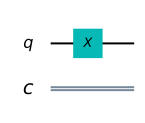

In [4]:
qc1 = QuantumCircuit(1,1)
qc1.x(0)
qc1.draw('mpl')

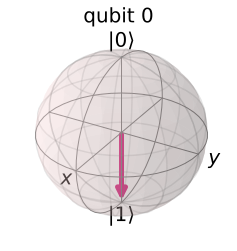

In [5]:
state1 = execute(qc1, statevector_simulator).result().get_statevector()
plot_bloch_multivector(state1)

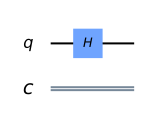

In [6]:
qc2 = QuantumCircuit(1,1)
qc2.h(0)
qc2.draw('mpl')

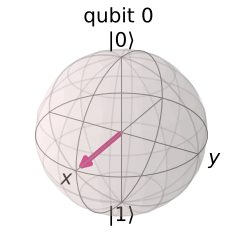

In [7]:
state2 = execute(qc2, statevector_simulator).result().get_statevector()
plot_bloch_multivector(state2)
#iplot_bloch_multivector(state2)

## Measurement
Measurement is an action that forces a qubit to either |0> or |1> based on probability.

![Schrodinger cat measurement](figures/schrodingers_cat_measurement.png)

## Add measurement

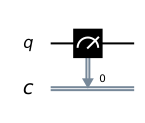

In [8]:
qc0.measure([0],[0])
qc0.draw('mpl')

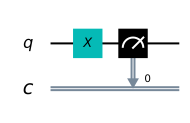

In [9]:
qc1.measure([0],[0])
qc1.draw('mpl')

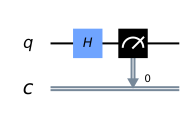

In [10]:
qc2.measure([0],[0])
qc2.draw('mpl')

## Measurement outcome

In [11]:
qasm_simulator = Aer.get_backend('qasm_simulator')
counts0 = execute(qc0, qasm_simulator, shots=1024).result().get_counts()
counts1 = execute(qc1, qasm_simulator, shots=1024).result().get_counts()
counts2 = execute(qc2, qasm_simulator, shots=1024).result().get_counts()
print(counts0, counts1, counts2)

{'0': 1024} {'1': 1024} {'1': 489, '0': 535}


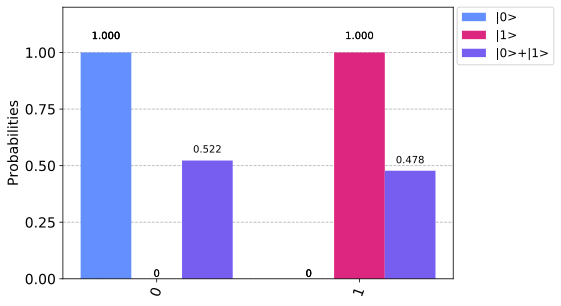

In [12]:
plot_histogram([counts0, counts1, counts2], legend=['|0>','|1>','|0>+|1>'])

## Entanglement
Entanglement strongly connects two or more qubits so that their quantum states are no longer independent.

<center><img src="figures/quantum_entanglement.jpg" alt="Quantum entanglement" style="width: 1000px;"/></center>

## Bell state 

The simplest entangled state is the famous Bell state: $|\phi\rangle = \tfrac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$ 

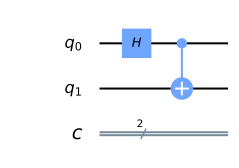

In [13]:
qc4 = QuantumCircuit(2,2)
qc4.h(0)
qc4.cx(0,1)
qc4.draw('mpl')

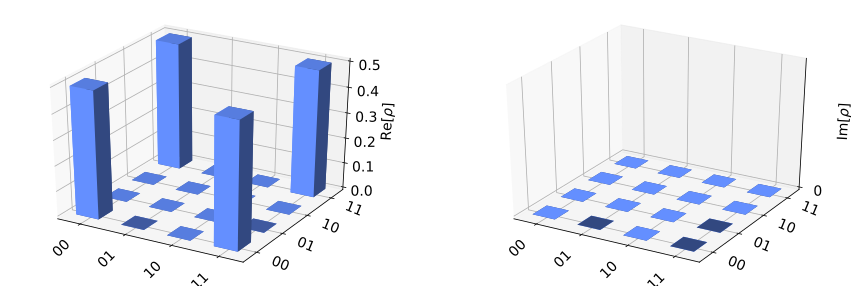

In [14]:
state4 = execute(qc4, statevector_simulator).result().get_statevector()
plot_state_city(state4)

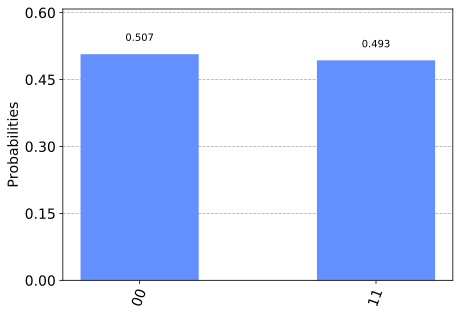

In [15]:
qc4.measure([0,1],[0,1])
counts4 = execute(qc4, qasm_simulator).result().get_counts()
plot_histogram(counts4)

## Quantum gates
Quantum gates perform the basic computational operations on qubits (think of as counterparts to classical and, +, and so on).

![Quantum gates](figures/quantum_gates.png)

- [Quantum instruction glossary](https://quantum-computing.ibm.com/docs/circ-comp/q-gates)
- [IBM Quantum Experience](https://quantum-computing.ibm.com/composer/ddfedca0eb599c89a1a38ee16be048a5)

## Interferenece
Interference allows us to increase the probability of getting the right answer and decrease the chance of getting the wrong one.

[IBM Quantum Experience Demo: Grover's algorithm](https://quantum-computing.ibm.com/composer/3cf2c268c828e4316ccd9988745539d9)

![Grover's algorithm](figures/grover_algorithm.png)

In [16]:
grover_str = """

OPENQASM 2.0;
include "qelib1.inc";

qreg q[3];
creg c[3];

h q[0];
h q[1];
h q[2];
barrier q[0],q[1],q[2];
x q[0];
x q[2];
h q[2];
ccx q[0],q[1],q[2];
x q[0];
h q[2];
x q[2];
barrier q[0],q[1],q[2];
h q[0];
h q[1];
h q[2];
barrier q[0],q[1],q[2];
x q[0];
x q[1];
x q[2];
h q[2];
ccx q[0],q[1],q[2];
x q[0];
x q[1];
h q[2];
x q[2];
barrier q[0],q[1],q[2];
h q[0];
h q[1];
h q[2];
barrier q[0],q[1],q[2];
x q[0];
x q[2];
h q[2];
ccx q[0],q[1],q[2];
x q[0];
h q[2];
x q[2];
barrier q[0],q[1],q[2];
h q[0];
h q[1];
h q[2];
barrier q[0],q[1],q[2];
x q[0];
x q[1];
x q[2];
h q[2];
ccx q[0],q[1],q[2];
x q[0];
x q[1];
h q[2];
x q[2];
barrier q[0],q[1],q[2];
h q[0];
h q[1];
h q[2];
barrier q[0],q[1],q[2];
measure q[0] -> c[0];
measure q[1] -> c[1];
measure q[2] -> c[2];

"""

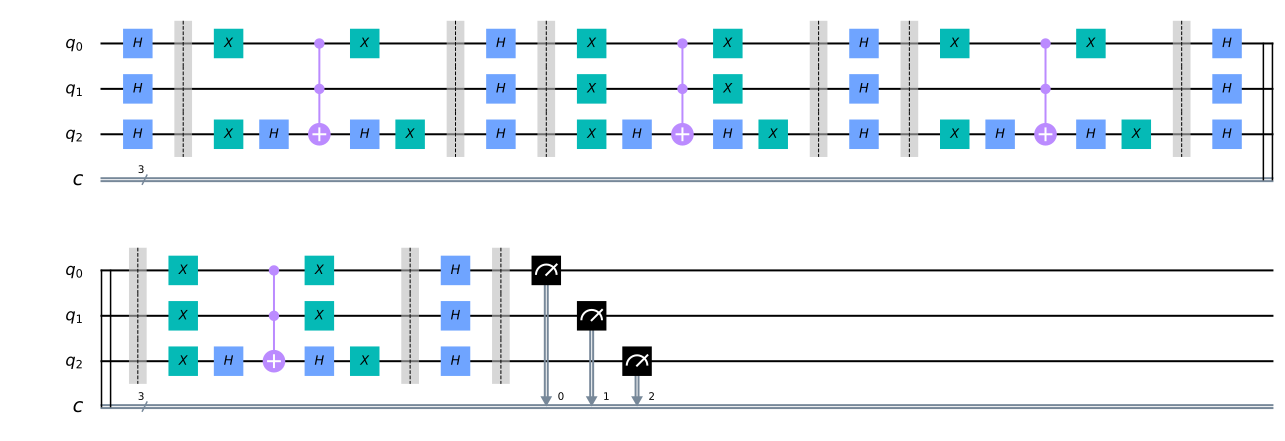

In [17]:
grover_circuit = QuantumCircuit.from_qasm_str(grover_str)
grover_circuit.draw('mpl')

In [18]:
def hadamard_all(qc):
    for qubit in range(qc.num_qubits):
        qc.h(qubit)
    qc.barrier()
    
def oracle_010(qc):
    qc.x(0)
    qc.x(2)
    qc.h(2)
    qc.ccx(0,1,2)
    qc.h(2)
    qc.x(0)
    qc.x(2)
    qc.barrier()

In [19]:
def reflection(qc):
    #qc.append(reflection_100_gate,[0,1,2])
    for qubit in range(qc.num_qubits):
        qc.x(qubit)
        
    qc.h(2)
    qc.ccx(0,1,2)
    qc.h(2)
    
    for qubit in range(qc.num_qubits):
        qc.x(qubit)
    qc.barrier()

def measure_all(qc):
    new_creg = qc._create_creg(len(qc.qubits), 'meas')
    qc.add_register(new_creg)
    #qc.barrier()
    qc.measure(qc.qubits, new_creg)

In [20]:
def grover_iteration(qc, iteration):
    for i in range(iteration):
        oracle_010(qc)
        qc.snapshot('oracle'+str(i+1))
        hadamard_all(qc)
        reflection(qc)
        hadamard_all(qc)
        qc.snapshot('reflection'+str(i+1))
    
def get_snapshot_statevector(result, label):
    return result.data()['snapshots']['statevector'][label]

def plot_snapshot_amplitude(snapshot):
    state = np.asarray(snapshot[0])
    amplitude = {}
    for i in range(len(state)):
        amplitude[f'{i:03b}'] = state[i].real
    return plt.bar(amplitude.keys(),amplitude.values())

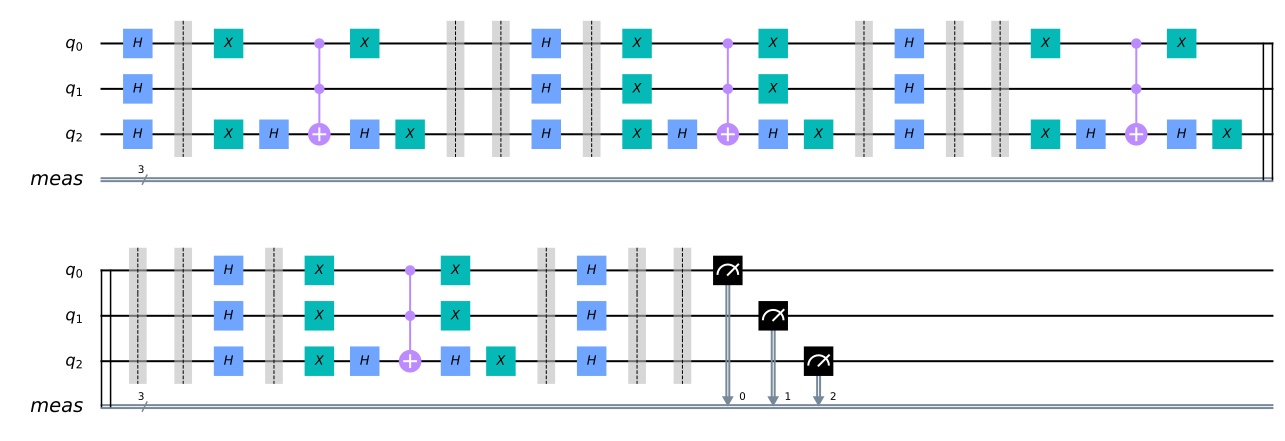

In [21]:
num_qubit = 3
grover_circuit = QuantumCircuit(num_qubit)
hadamard_all(grover_circuit)
grover_iteration(grover_circuit, 2)
measure_all(grover_circuit)
grover_circuit.draw('mpl')

In [22]:
job_sim = execute(grover_circuit, statevector_simulator)
result = job_sim.result()

<BarContainer object of 8 artists>

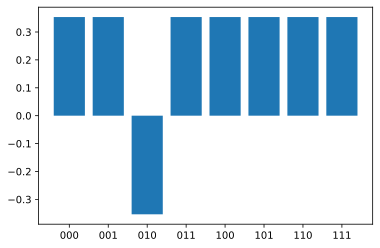

In [23]:
snap1 = get_snapshot_statevector(result, 'oracle1')
plot_snapshot_amplitude(snap1)

<BarContainer object of 8 artists>

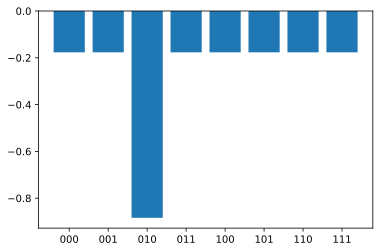

In [24]:
snap2 = get_snapshot_statevector(result, 'reflection1')
plot_snapshot_amplitude(snap2)

<BarContainer object of 8 artists>

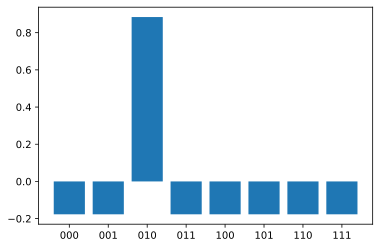

In [25]:
snap3 = get_snapshot_statevector(result, 'oracle2')
plot_snapshot_amplitude(snap3)

<BarContainer object of 8 artists>

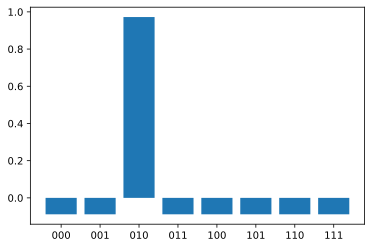

In [26]:
snap4 = get_snapshot_statevector(result, 'reflection2')
plot_snapshot_amplitude(snap4)

# Qiskit education resources
- [Coding with Qiskit Youtube series](https://www.youtube.com/watch?v=a1NZC5rqQD8&list=PLOFEBzvs-Vvp2xg9-POLJhQwtVktlYGbY)
- [Get started with IBM Quantum Experience](https://quantum-computing.ibm.com/docs/)
- [Qiskit textbook](https://qiskit.org/textbook/preface.html)
- [Qiskit Live](https://www.youtube.com/channel/UClBNq7mCMf5xm8baE_VMl3A/featured)
- [Qiskit Twitter](https://twitter.com/qiskit)
- [Qiskit Slack](https://join.slack.com/t/qiskit/shared_invite/enQtODQ2NTIyOTgwMTQ3LTI0NzM2NzkzZjJhNDgzZjY5MTQzNDY3MGNiZGQzNTNkZTE4Nzg1MjMwMmFjY2UwZTgyNDlmYWQwYmZjMjE1ZTM)
- [Let's play quantum games](https://www.sginnovate.com/events/let%E2%80%99s-play-quantum-games-online-event)


## Coding with Qiskit

In [27]:
from IPython.display import IFrame
IFrame(src="https://www.youtube.com/embed/a1NZC5rqQD8", width=1200, height=675)

## Qiskit Live

In [28]:
IFrame(src="https://www.youtube.com/embed/Omv-bPvQ3E8", width=1200, height=675)

## Let's play quantum games!
![Let's play quantum games](figures/letsplayquantumgames.jpg)
[Register](https://www.sginnovate.com/events/let%E2%80%99s-play-quantum-games-online-event)